In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [56]:
# Load the dataset
df = pd.read_csv('london_weather.csv')

# Check the first few rows
print(df.head())

       date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0  19790101          2.0       7.0              52.0       2.3       -4.1   
1  19790102          6.0       1.7              27.0       1.6       -2.6   
2  19790103          5.0       0.0              13.0       1.3       -2.8   
3  19790104          8.0       0.0              13.0      -0.3       -2.6   
4  19790105          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  
0      -7.5            0.4  101900.0         9.0  
1      -7.5            0.0  102530.0         8.0  
2      -7.2            0.0  102050.0         4.0  
3      -6.5            0.0  100840.0         2.0  
4      -1.4            0.0  102250.0         1.0  


In [57]:
# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])

In [58]:
# Extract year and month from the date
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month

In [59]:
# Drop the 'date' column only if it exists
if 'date' in df.columns:
    df = df.drop(columns=['date'])

# Fill missing values with 0 for all columns
df = df.fillna(0)

#print(df.isnull().sum()) checking number of missing values in each column

In [60]:
# Features (excluding the target variable)
X = df[['cloud_cover', 'sunshine', 'global_radiation', 'pressure', 'snow_depth', 'Year', 'Month']]
# Target variable (let's predict the mean temperature, but you can change it to max_temp or min_temp)
y = df['mean_temp']

In [61]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
# Train a Random Forest model
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [72]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [73]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 16.08458669321936


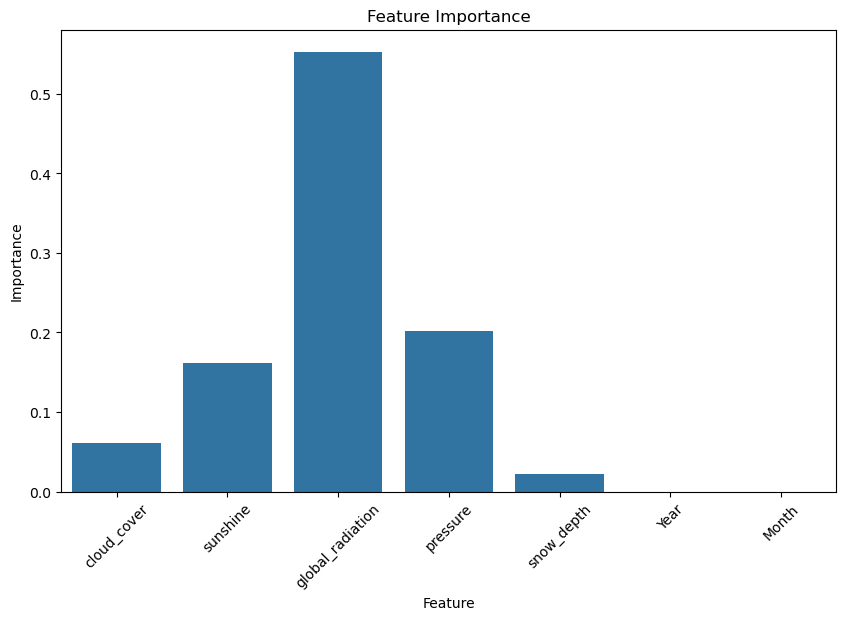

In [79]:
# Plot 1: Feature Importance
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=feature_importances)
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

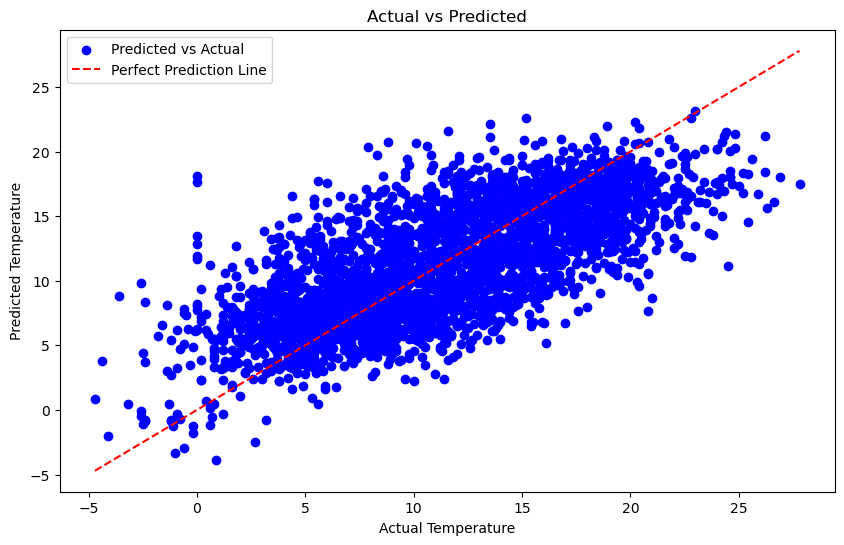

In [85]:
# Plot 2: Actual vs Predicted with Legend
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted
scatter = plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

# Diagonal line representing perfect predictions
line = plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')

# Add titles and labels
plt.title('Actual vs Predicted')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')

# Add legend
plt.legend(loc='best')

# Show the plot
plt.show()